<img src="https://i.postimg.cc/ydZcb9cY/Hello.jpg">

<!-- Load Google Font (Example: 'Pacifico') -->
<link href="https://fonts.googleapis.com/css2?family=Pacifico&display=swap" rel="stylesheet">

<a id="import"></a>
<p style="background: linear-gradient(45deg, #1e90ff, #00bfff); /* Gradient background */
           font-family: 'Pacifico', cursive;  /* Custom font from Google Fonts */
           color: white; 
           font-size: 350%; /* Increased font size for more emphasis */
           text-align: center; 
           border-radius: 30px 60px; /* Adjusted border radius for a unique shape */
           padding: 25px;
           text-shadow: 3px 3px 8px rgba(0, 0, 0, 0.5);  /* More pronounced 3D text shadow */
           letter-spacing: 3px;  /* Extra spacing for a premium look */
           box-shadow: 0 4px 15px rgba(0, 0, 0, 0.3); /* Adds a shadow around the entire box */
           border: 2px solid white; /* White border around the text block */
           transition: transform 0.3s ease;"> <!-- Adds a hover transition effect -->
    Credit Card Fraud Detection
</p>

<!-- Add a hover effect for interaction -->
<style>
p:hover {
    transform: scale(1.05); /* Slight zoom-in effect on hover */
}
</style>


<div style="text-align: center;">
    <img src="https://i.postimg.cc/bJw2w0m1/credit-card-PNG39-removebg-preview.png" alt="Credit Card" style="max-width: 100%; height: auto; border-radius: 15px;">
</div>

<a id="import"></a>
# <p style="background-color:purple; font-family:calibri; color:white; font-size:170%; text-align:center; border-radius:45px 50px;">Step 1 | Import Libraries</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.getcwd()

'C:\\Users\\dell'

In [3]:
os.chdir('C:\\Users\\dell\\downloads')

In [4]:
import os
os.getcwd()

'C:\\Users\\dell\\downloads'

<a id="Read"></a>
# <p style="background-color:purple; font-family:calibri; color:white; font-size:170%; text-align:center; border-radius:45px 50px;">Step 2 | Read Dataset</p>

In [5]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# it will show all column
pd.options.display.max_columns = None
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [8]:
df.shape

(284807, 31)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [11]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
# amount column converted in range of 0 to 1
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
df.duplicated().any()

True

In [15]:
df = df.drop_duplicates()
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [16]:
df.shape

(283726, 31)

<a id="Visual"></a>
# <p style="background-color:purple; font-family:calibri; color:white; font-size:170%; text-align:center; border-radius:45px 50px;">Step 3 | Exploratory Data Analysis</p>

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

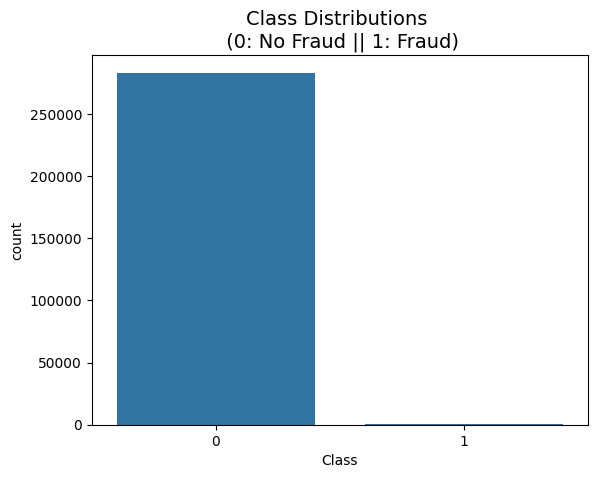

In [17]:
sns.countplot(x='Class',data = df)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

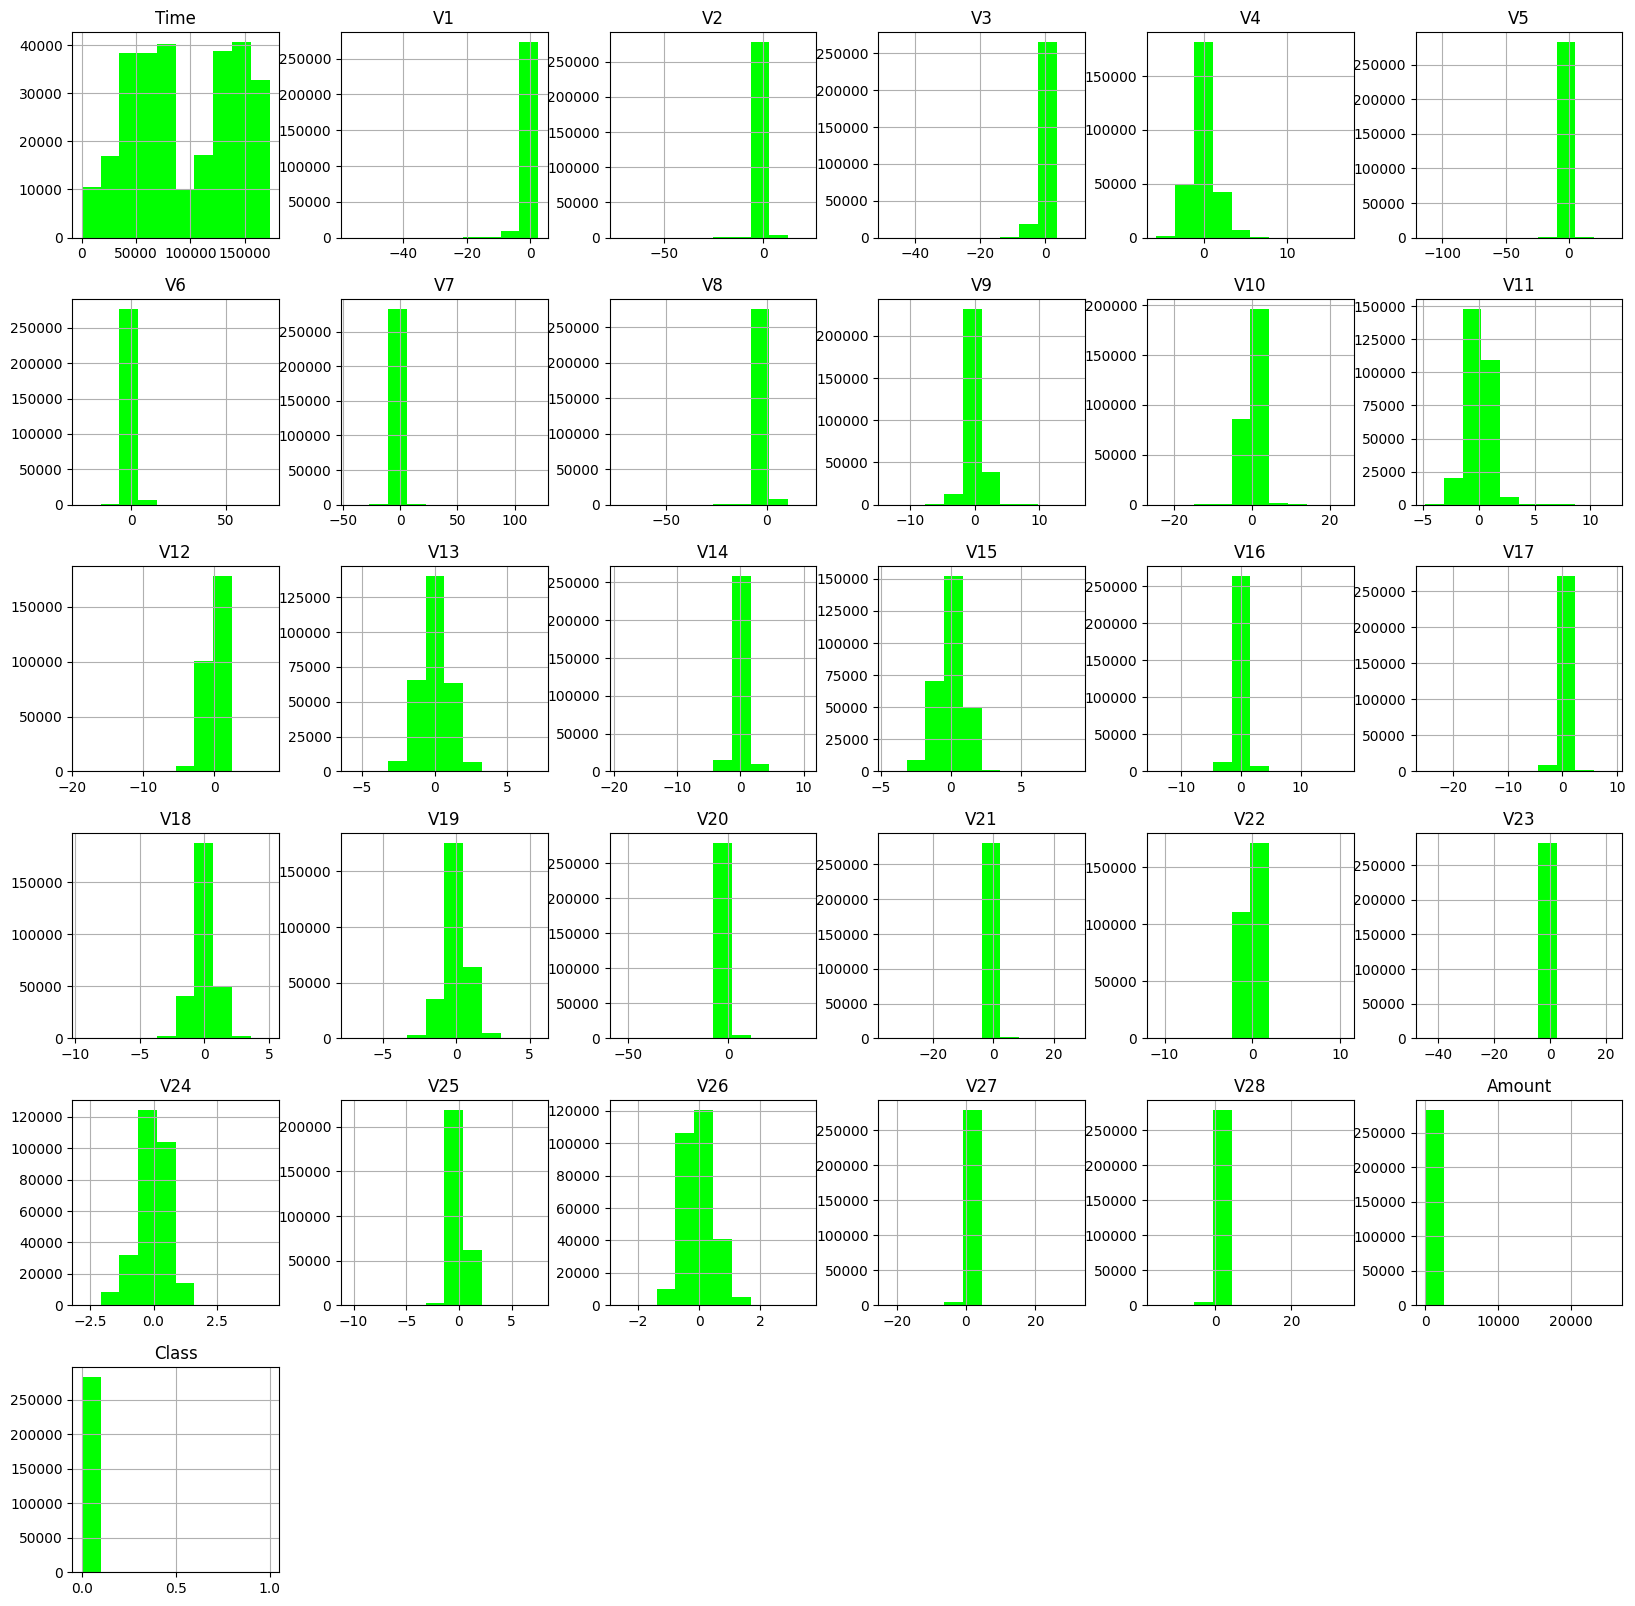

In [18]:
df.hist(figsize=(20,20),color='lime')
plt.show()

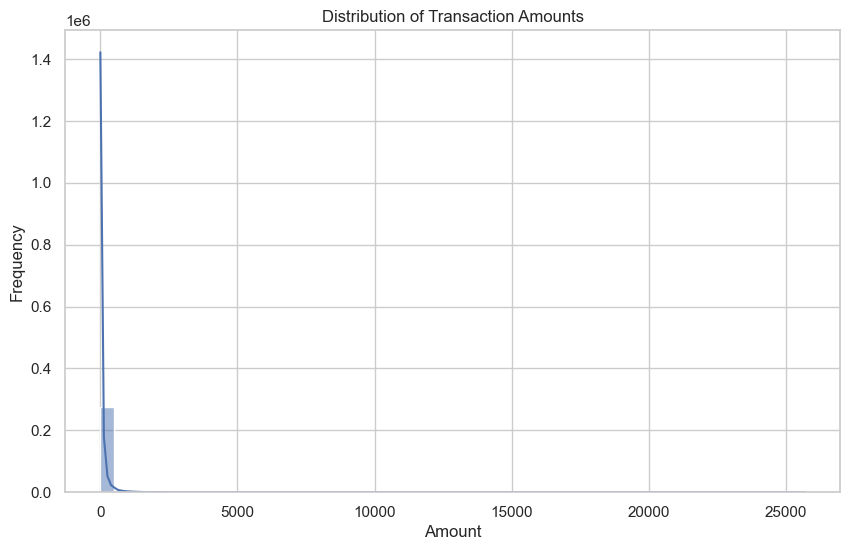

In [19]:
sns.set(style='whitegrid')

# Create a histogram of the 'Amount' column
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

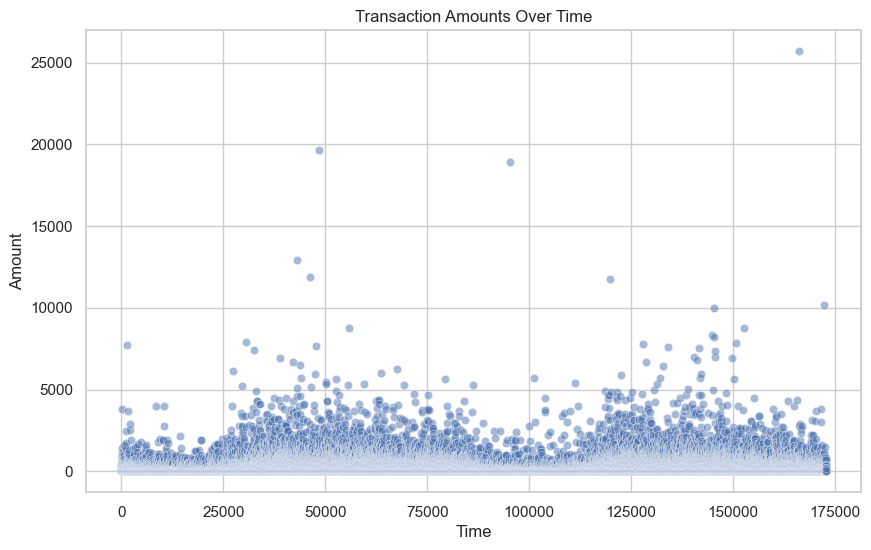

In [20]:
# Create a scatter plot of 'Time' vs 'Amount'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time', y='Amount', data=df, alpha=0.5)
plt.title('Transaction Amounts Over Time')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

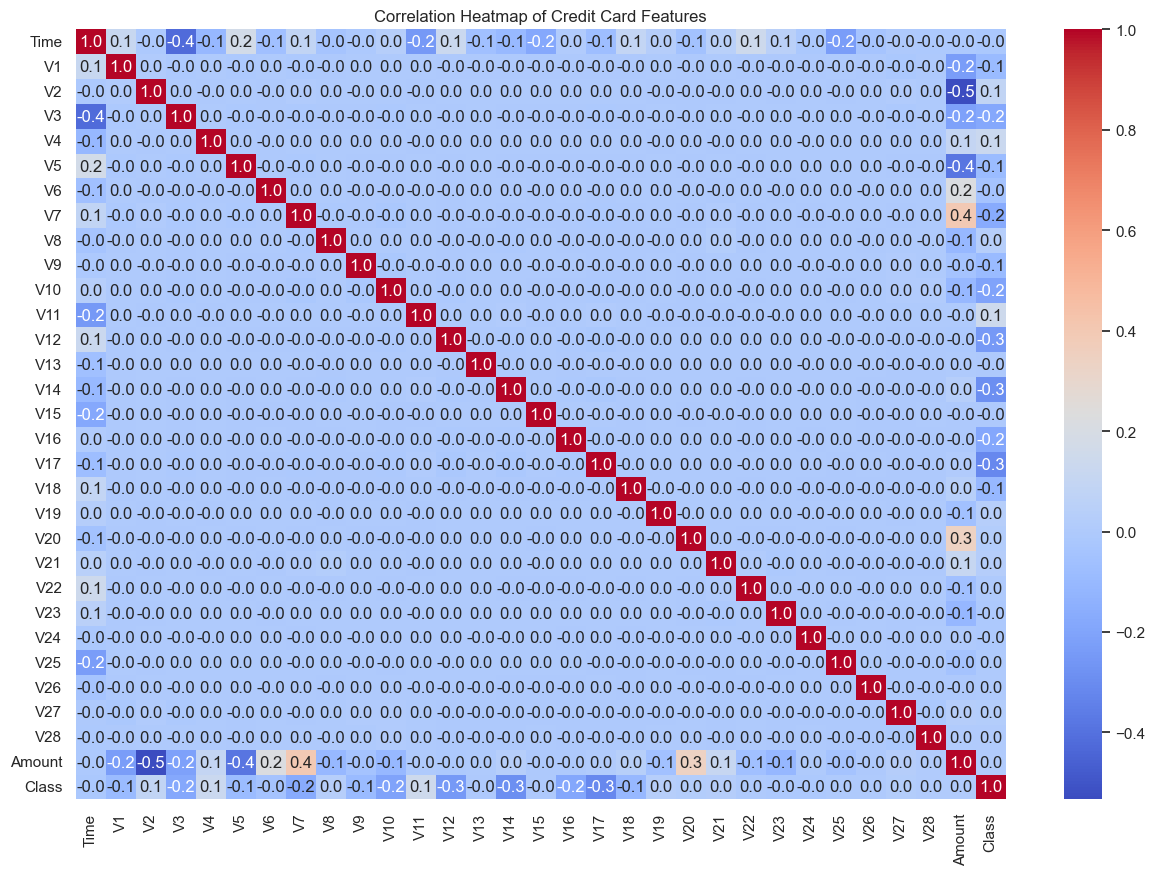

In [21]:
# Create the correlation heatmap with annotations
plt.figure(figsize=(15, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".1f")  # annot=True to show numbers, fmt=".2f" to format to 2 decimal places
plt.title('Correlation Heatmap of Credit Card Features')
plt.show()

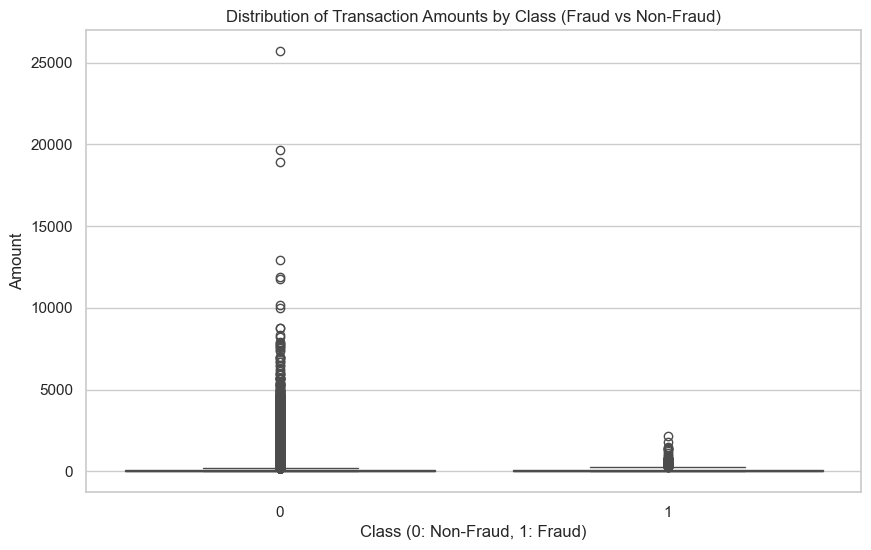

In [22]:
# Create a box plot for the 'Amount' column, grouped by 'Class'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Distribution of Transaction Amounts by Class (Fraud vs Non-Fraud)')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Amount')
plt.show()

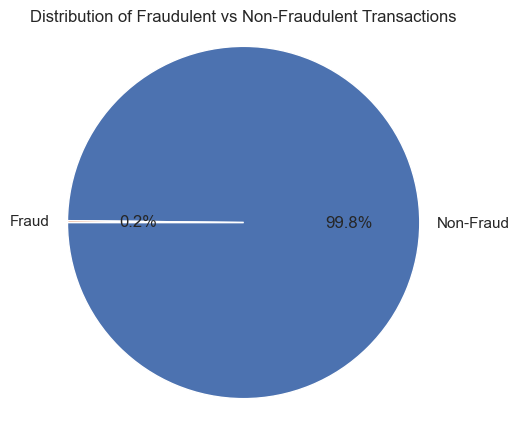

In [23]:
# Create a pie chart for the distribution of fraudulent vs non-fraudulent transactions
fraud_count = df['Class'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(fraud_count.values, labels=['Non-Fraud', 'Fraud'], autopct='%1.1f%%', startangle=180)
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.axis('equal')
plt.show()

In [24]:
df.drop(columns=['Time'], inplace=True)

In [25]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [26]:
# imbalance data 
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [27]:
fraud_cases=len(df[df['Class']==1])

In [28]:
print(' Number of Fraud Cases:',fraud_cases)

 Number of Fraud Cases: 473


In [29]:
non_fraud_cases=len(df[df['Class']==0])

In [30]:
print('Number of Non Fraud Cases:',non_fraud_cases)

Number of Non Fraud Cases: 283253


In [31]:
# separating the data for analysis
legit = df[df.Class == 0]

In [32]:
fraud = df[df.Class == 1]

In [33]:
legit.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [34]:
fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [35]:
# compare the values for both transactions
df.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,0.007663,-0.006004,0.009476,0.000762,0.011668,0.001166,0.007845,0.010963,0.005120,-0.001382,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,-5.453274,3.716347,-6.103254,-0.094324,-6.835946,-0.072830,-4.000956,-6.463285,-2.157071,0.669143,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


In [36]:
legit_sample = legit.sample(n=473)

In [37]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)
new_dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
106139,1.295118,0.257074,-0.166946,0.305264,0.237080,-0.084627,-0.054801,0.029695,-0.116116,-0.106170,0.552849,0.429107,0.140834,-0.120139,0.501425,1.025249,-0.668941,0.602480,0.532688,-0.044564,-0.314945,-0.949460,-0.025195,-0.883592,0.334867,0.150055,-0.029799,0.008393,1.98,0
158262,2.103077,-0.029392,-1.455872,0.336260,0.276746,-0.751520,-0.034006,-0.272978,2.280568,-0.425743,-0.299011,-3.095609,0.263509,2.187692,0.346089,-0.142823,0.164544,0.659205,-0.271193,-0.355868,0.078436,0.550755,0.008453,0.395488,0.316608,-0.470412,-0.033189,-0.059343,1.00,0
171844,0.542823,-2.573677,-1.365007,1.765772,-0.958231,0.224394,0.494224,-0.182581,0.884544,-0.130830,-1.566801,-0.011200,0.271874,0.155211,0.985739,0.727627,-0.980724,0.671895,-0.788286,1.299973,0.637198,0.282599,-0.614077,-0.755096,-0.283772,-0.591632,-0.084325,0.093348,762.00,0
33737,-0.999682,1.538412,0.509502,-0.485314,0.540350,-0.050640,0.552809,0.174917,-0.013572,0.583014,0.526753,0.300154,0.327280,-0.531786,0.316496,0.853721,-0.699077,0.678380,0.548120,0.550604,-0.379383,-0.851784,-0.135866,-0.898324,0.124983,0.140200,0.549266,0.281379,5.36,0
103550,-0.712689,0.884897,0.322472,1.450236,-0.721902,-0.520693,0.896301,0.328091,-0.411238,-0.199778,-1.169154,-0.686422,-1.538596,0.837838,0.347775,-0.645110,0.453863,0.142082,0.870810,0.245066,0.191070,0.401527,0.313953,0.357521,-0.381294,-0.260157,0.278162,0.205971,157.49,0


In [38]:
new_dataset.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.120661,-0.037691,0.072994,-0.042867,-0.039596,0.059299,0.074827,0.055063,-0.008541,-0.055062,0.034020,-0.066385,0.016535,0.040682,0.064546,0.041298,0.038407,0.024921,-0.021147,-0.032821,-0.008151,0.046345,0.016754,0.015246,0.014242,-0.005394,0.033871,-0.009656,94.378182
1,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,-5.453274,3.716347,-6.103254,-0.094324,-6.835946,-0.072830,-4.000956,-6.463285,-2.157071,0.669143,0.405043,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


In [39]:
X = new_dataset.drop(columns='Class', axis=1)
y = new_dataset['Class']

In [40]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
106139,1.295118,0.257074,-0.166946,0.305264,0.237080,-0.084627,-0.054801,0.029695,-0.116116,-0.106170,0.552849,0.429107,0.140834,-0.120139,0.501425,1.025249,-0.668941,0.602480,0.532688,-0.044564,-0.314945,-0.949460,-0.025195,-0.883592,0.334867,0.150055,-0.029799,0.008393,1.98
158262,2.103077,-0.029392,-1.455872,0.336260,0.276746,-0.751520,-0.034006,-0.272978,2.280568,-0.425743,-0.299011,-3.095609,0.263509,2.187692,0.346089,-0.142823,0.164544,0.659205,-0.271193,-0.355868,0.078436,0.550755,0.008453,0.395488,0.316608,-0.470412,-0.033189,-0.059343,1.00
171844,0.542823,-2.573677,-1.365007,1.765772,-0.958231,0.224394,0.494224,-0.182581,0.884544,-0.130830,-1.566801,-0.011200,0.271874,0.155211,0.985739,0.727627,-0.980724,0.671895,-0.788286,1.299973,0.637198,0.282599,-0.614077,-0.755096,-0.283772,-0.591632,-0.084325,0.093348,762.00
33737,-0.999682,1.538412,0.509502,-0.485314,0.540350,-0.050640,0.552809,0.174917,-0.013572,0.583014,0.526753,0.300154,0.327280,-0.531786,0.316496,0.853721,-0.699077,0.678380,0.548120,0.550604,-0.379383,-0.851784,-0.135866,-0.898324,0.124983,0.140200,0.549266,0.281379,5.36
103550,-0.712689,0.884897,0.322472,1.450236,-0.721902,-0.520693,0.896301,0.328091,-0.411238,-0.199778,-1.169154,-0.686422,-1.538596,0.837838,0.347775,-0.645110,0.453863,0.142082,0.870810,0.245066,0.191070,0.401527,0.313953,0.357521,-0.381294,-0.260157,0.278162,0.205971,157.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [41]:
y

106139    0
158262    0
171844    0
33737     0
103550    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 946, dtype: int64

In [42]:
# split the data into training and testing sets using the train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=2)

In [43]:
print(X.shape, X_train.shape, X_test.shape)

(946, 29) (756, 29) (190, 29)


<a id="Visual"></a>
# <p style="background-color:purple; font-family:calibri; color:white; font-size:170%; text-align:center; border-radius:45px 50px;">Step 4 | Models</p>

<a id="Visual"></a>
# <p style="background-color:green; font-family:calibri; color:white; font-size:170%; text-align:center; border-radius:45px 50px;">Step 4.1 | LogisticRegression</p>

In [44]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [45]:
X_test_prediction = model.predict(X_test)
acc_1 = accuracy_score(X_test_prediction, y_test)
print('Accuracy score on Test Data : ', acc_1)

Accuracy score on Test Data :  0.9263157894736842


In [46]:
conf_matrix = confusion_matrix(y_test, X_test_prediction)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[84  4]
 [10 92]]


In [47]:
class_report = classification_report(y_test, X_test_prediction)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        88
           1       0.96      0.90      0.93       102

    accuracy                           0.93       190
   macro avg       0.93      0.93      0.93       190
weighted avg       0.93      0.93      0.93       190



<a id="Visual"></a>
# <p style="background-color:green; font-family:calibri; color:white; font-size:170%; text-align:center; border-radius:45px 50px;">Step 4.2 | DecisionTreeClassifier</p>

In [48]:
model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)

DecisionTreeClassifier()

In [49]:
X_test_prediction1 = model1.predict(X_test)
acc_2 = accuracy_score(X_test_prediction1, y_test)
print('Accuracy score on Test Data : ', acc_2)

Accuracy score on Test Data :  0.8842105263157894


In [50]:
conf_matrix = confusion_matrix(y_test, X_test_prediction1)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[75 13]
 [ 9 93]]


In [51]:
class_report = classification_report(y_test, X_test_prediction1)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        88
           1       0.88      0.91      0.89       102

    accuracy                           0.88       190
   macro avg       0.89      0.88      0.88       190
weighted avg       0.88      0.88      0.88       190



<a id="Visual"></a>
# <p style="background-color:green; font-family:calibri; color:white; font-size:170%; text-align:center; border-radius:45px 50px;">Step 4.3 | RandomForestClassifier</p>

In [52]:
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)

RandomForestClassifier()

In [53]:
X_test_prediction2 = model2.predict(X_test)
acc_3 = accuracy_score(X_test_prediction2, y_test)
print('Accuracy score on Test Data : ', acc_3)

Accuracy score on Test Data :  0.9263157894736842


In [54]:
conf_matrix = confusion_matrix(y_test, X_test_prediction2)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[86  2]
 [12 90]]


In [55]:
class_report = classification_report(y_test, X_test_prediction2)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.92        88
           1       0.98      0.88      0.93       102

    accuracy                           0.93       190
   macro avg       0.93      0.93      0.93       190
weighted avg       0.93      0.93      0.93       190



<a id="Visual"></a>
# <p style="background-color:green; font-family:calibri; color:white; font-size:170%; text-align:center; border-radius:45px 50px;">Step 4.4 | XGBClassifier</p>

In [56]:
model3 = XGBClassifier()
model3.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [57]:
X_test_prediction3 = model3.predict(X_test)
acc_4 = accuracy_score(X_test_prediction3, y_test)
print('Accuracy score on Test Data : ', acc_4)

Accuracy score on Test Data :  0.9210526315789473


In [58]:
conf_matrix = confusion_matrix(y_test, X_test_prediction3)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[84  4]
 [11 91]]


In [59]:
class_report = classification_report(y_test, X_test_prediction3)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92        88
           1       0.96      0.89      0.92       102

    accuracy                           0.92       190
   macro avg       0.92      0.92      0.92       190
weighted avg       0.92      0.92      0.92       190



<a id="Visual"></a>
# <p style="background-color:green; font-family:calibri; color:white; font-size:170%; text-align:center; border-radius:45px 50px;">Step 4.5 | Support Vector Classifier</p>

<h2 style="color: darkblue; font-family: 'Arial', sans-serif; text-align: left; padding: 10px;">
    Before Hyper Tuning
</h2>

In [60]:
model4 = SVC()
model4.fit(X_train, y_train)

SVC()

In [61]:
X_test_prediction4 = model4.predict(X_test)
acc_5 = accuracy_score(X_test_prediction4, y_test)
print('Accuracy score on Test Data : ', acc_5)

Accuracy score on Test Data :  0.6578947368421053


In [62]:
conf_matrix = confusion_matrix(y_test, X_test_prediction4)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[79  9]
 [56 46]]


In [63]:
class_report = classification_report(y_test, X_test_prediction4)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.90      0.71        88
           1       0.84      0.45      0.59       102

    accuracy                           0.66       190
   macro avg       0.71      0.67      0.65       190
weighted avg       0.72      0.66      0.64       190



<h2 style="color: darkblue; font-family: 'Arial', sans-serif; text-align: left; padding: 10px;">
    Hyper Tunning
</h2>

In [64]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1],
    'gamma': [1, 0.1],
    'kernel': ['linear']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)


Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'linear'}


<h2 style="color: darkblue; font-family: 'Arial', sans-serif; text-align: left; padding: 10px;">
    After Hyper Tunning
</h2>

In [65]:
# Predict using the best model
X_test_prediction_best = best_model.predict(X_test)

# Evaluate the model
acc_best1 = accuracy_score(X_test_prediction_best, y_test)
print('Accuracy score on Test Data after hyperparameter tuning: ', acc_best1)


Accuracy score on Test Data after hyperparameter tuning:  0.9315789473684211


In [66]:
conf_matrix_best = confusion_matrix(y_test, X_test_prediction_best)
print("Confusion Matrix after hyperparameter tuning:")
print(conf_matrix_best)


Confusion Matrix after hyperparameter tuning:
[[85  3]
 [10 92]]


In [67]:
class_report_best = classification_report(y_test, X_test_prediction_best)
print("Classification Report after hyperparameter tuning:")
print(class_report_best)


Classification Report after hyperparameter tuning:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        88
           1       0.97      0.90      0.93       102

    accuracy                           0.93       190
   macro avg       0.93      0.93      0.93       190
weighted avg       0.93      0.93      0.93       190



<a id="Visual"></a>
# <p style="background-color:green; font-family:calibri; color:white; font-size:170%; text-align:center; border-radius:45px 50px;">Step 4.6 | KNeighborsClassifier</p>

<h2 style="color: darkblue; font-family: 'Arial', sans-serif; text-align: left; padding: 10px;">
    Before Hyper Tuning
</h2>

In [68]:
model5 = KNeighborsClassifier()
model5.fit(X_train, y_train)

KNeighborsClassifier()

In [69]:
X_test_prediction5 = model5.predict(X_test)
acc_6 = accuracy_score(X_test_prediction5, y_test)
print('Accuracy score on Test Data : ', acc_6)

Accuracy score on Test Data :  0.9


In [70]:
conf_matrix = confusion_matrix(y_test, X_test_prediction5)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[81  7]
 [12 90]]


In [71]:
class_report = classification_report(y_test, X_test_prediction5)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90        88
           1       0.93      0.88      0.90       102

    accuracy                           0.90       190
   macro avg       0.90      0.90      0.90       190
weighted avg       0.90      0.90      0.90       190



<h2 style="color: darkblue; font-family: 'Arial', sans-serif; text-align: left; padding: 10px;">
    Hyper Tunning
</h2>

In [72]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', ],
    'algorithm': ['auto', 'ball_tree']
}

# Initialize the GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

# Fit the model with the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)


Best Parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'}


<h2 style="color: darkblue; font-family: 'Arial', sans-serif; text-align: left; padding: 10px;">
    After Hyper Tunning
</h2>

In [73]:
# Predict using the best model
X_test_prediction_best = best_model.predict(X_test)

# Evaluate the model
acc_best2 = accuracy_score(X_test_prediction_best, y_test)
print('Accuracy score on Test Data after hyperparameter tuning: ', acc_best2)



Accuracy score on Test Data after hyperparameter tuning:  0.9157894736842105


In [74]:
conf_matrix_best = confusion_matrix(y_test, X_test_prediction_best)
print("Confusion Matrix after hyperparameter tuning:")
print(conf_matrix_best)


Confusion Matrix after hyperparameter tuning:
[[84  4]
 [12 90]]


In [75]:
class_report_best = classification_report(y_test, X_test_prediction_best)
print("Classification Report after hyperparameter tuning:")
print(class_report_best)

Classification Report after hyperparameter tuning:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        88
           1       0.96      0.88      0.92       102

    accuracy                           0.92       190
   macro avg       0.92      0.92      0.92       190
weighted avg       0.92      0.92      0.92       190



<a id="Visual"></a>
# <p style="background-color:green; font-family:calibri; color:white; font-size:170%; text-align:center; border-radius:45px 50px;">Step 4.7 | GradientBoostingClassifier</p>

In [76]:
model6 = GradientBoostingClassifier()
model6.fit(X_train, y_train)

GradientBoostingClassifier()

In [77]:
X_test_prediction6 = model6.predict(X_test)
acc_7 = accuracy_score(X_test_prediction6, y_test)
print('Accuracy score on Test Data : ', acc_7)

Accuracy score on Test Data :  0.9157894736842105


In [78]:
conf_matrix = confusion_matrix(y_test, X_test_prediction6)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[84  4]
 [12 90]]


In [79]:
class_report = classification_report(y_test, X_test_prediction6)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        88
           1       0.96      0.88      0.92       102

    accuracy                           0.92       190
   macro avg       0.92      0.92      0.92       190
weighted avg       0.92      0.92      0.92       190



<a id="Visual"></a>
# <p style="background-color:purple; font-family:calibri; color:white; font-size:170%; text-align:center; border-radius:45px 50px;">Step 5 | DataFrame</p>

In [80]:
result = pd.DataFrame({
    'Model': ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier','XGBClassifier', 'SVC','KNeighborsClassifier', 'GradientBoostingClassifier'],
    'Accuracy' : [acc_1,acc_2, acc_3, acc_4, acc_best1, acc_best2,acc_7]
})
result['Accuracy'] = result['Accuracy'].round(4)

result.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
4,SVC,0.9316
0,LogisticRegression,0.9263
2,RandomForestClassifier,0.9263
3,XGBClassifier,0.9211
5,KNeighborsClassifier,0.9158
6,GradientBoostingClassifier,0.9158
1,DecisionTreeClassifier,0.8842


<div style="border-radius:20px; padding: 15px; font-size:100%; text-align:left; background-image: url(https://i.postimg.cc/jSJ5x4BM/bubbles-83683-640.jpg)">

<h3 style="font-size:185%; font-weight:bolder; color:Green">Results : </h3>

<span style="font-size:120%; font-weight:700; color:black">Acording to the above plots, best Model  base on Score is :</span>

<span style="font-size:100%; font-weight:500; color:black">
<ul><b>Support Vector Classifier </b></ul>
</br>
</span>

<span style="font-size:150%; font-weight:bolder; color:grey">So, We choose <mark> Support Vector Classifier </mark></span>
</div>

<h2 style="color: darkblue; font-family: 'Arial', sans-serif; text-align: left; padding: 10px;">
    LOC ROWS
</h2>

In [81]:
df.loc[5000:5000:].T

,5000
V1,1.007340
V2,-1.268269
V3,0.804611
V4,0.136104
V5,-1.633237
V6,-0.300999
V7,-0.772094
V8,-0.102115
V9,1.413870
V10,-0.007260


<a id="Visual"></a>
# <p style="background-color:purple; font-family:calibri; color:white; font-size:170%; text-align:center; border-radius:45px 50px;">Step 6 | Making a Predictive System</p>

In [82]:
input_data = (1.007340,-1.268269,0.804611,0.136104,-1.633237,-0.300999,-0.772094,-0.102115,1.413870,-0.007260,-0.368569,-2.709463,0.923654,0.988203,
            -1.613286,-1.914937,1.370277,1.004995,-0.479947,-0.257023,-0.586067,-1.076901,-0.084323,0.371567,0.169164,1.011535,-0.085150,0.031151,178.900000)
              
# changing the input_data to numpy array
array_input  = np.array(input_data)


# reshape the array as we are predicting for one instance
reshaped_input  = array_input.reshape(1,-1)

prediction = model.predict(reshaped_input)
print(prediction)

if (prediction[0] == 0):
    print('The Credit Card Customer is not Fraud')
else:
    print('The Credit Card Customer is Fraud')

[0]
The Credit Card Customer is not Fraud


<a id="Visual"></a>
# <p style="background-color:purple; font-family:calibri; color:white; font-size:170%; text-align:center; border-radius:45px 50px;">Step 7 | Saving the trained model</p>

In [83]:
import pickle

In [84]:
filename = 'Credit_card.sav'
pickle.dump(model6, open(filename, 'wb'))

In [85]:
# loading the saved model
loaded_model = pickle.load(open('Credit_card.sav', 'rb'))

In [86]:
input_data = (1.007340,-1.268269,0.804611,0.136104,-1.633237,-0.300999,-0.772094,-0.102115,1.413870,-0.007260,-0.368569,-2.709463,0.923654,0.988203,
            -1.613286,-1.914937,1.370277,1.004995,-0.479947,-0.257023,-0.586067,-1.076901,-0.084323,0.371567,0.169164,1.011535,-0.085150,0.031151,178.900000)
              
# changing the input_data to numpy array
array_input  = np.array(input_data)


# reshape the array as we are predicting for one instance
reshaped_input  = array_input.reshape(1,-1)

prediction = loaded_model.predict(reshaped_input)
print(prediction)

if (prediction[0] == 0):
    print('The Credit Card Customer is not Fraud')
else:
    print('The Credit Card Customer is Fraud')

[0]
The Credit Card Customer is not Fraud


In [87]:
for column in X.columns:
  print(column)

V1
V2
V3
V4
V5
V6
V7
V8
V9
V10
V11
V12
V13
V14
V15
V16
V17
V18
V19
V20
V21
V22
V23
V24
V25
V26
V27
V28
Amount


<img src='https://i.postimg.cc/t4b3WtCy/1000-F-291522205-Xkrm-S421-Fj-SGTMR.jpg'>

<div style="border-radius: 15px; border: 3px dashed #8a7d7f; padding: 20px; background-color: #f8f9fa; font-size: 100%; text-align: center; position: relative; box-shadow: 0 0 15px rgba(0, 0, 0, 0.2);">
    <div style="position: absolute; top: 0; left: 0; width: 100%; height: 100%; background: url('https://www.transparenttextures.com/patterns/confetti.png') repeat; opacity: 0.1; border-radius: 15px;"></div>
    <h4 style="color: #333333; margin-bottom: 20px; position: relative; z-index: 1;">🙏 Thank you for taking the time to consider this matter 🙏</h4>
    <hr style="border-top: 1px solid #dcdcdc; position: relative; z-index: 1;">
    <h4 style="color: #555555; position: relative; z-index: 1;"><b>Author:</b> Asif Shaikh</h4>
    <hr style="border-top: 1px solid #dcdcdc; position: relative; z-index: 1;">
    <center style="position: relative; z-index: 1;">
        <strong style="color: #333333; font-size: 120%;">👍 If you enjoyed this Notebook, please give it an upvote. 👍</strong>
    </center>
    <br>
    <center style="position: relative; z-index: 1;">
        <strong style="color: #e91e63; font-size: 120%;">💫 Best Wishes 💫</strong>
    </center>
</div>
